# SMAI Assignment - 2

## Question 3: Face Recognition using Principal Component Analysis

This question requires you to create a basic facial recognition system using a technique called principal component analysis (PCA)
by projecting the face images on the feature space (face space) which best
represents the variations among distinct faces. The face space is defined as the
“Eigenfaces", which are the eigenvectors of the set of faces.

The goal of implementing this system is to recognize a person's face by comparing it to a pre-existing database of faces, and identifying the closest match.

Link to paper on Eigenfaces: [https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf](https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf)

The AT&T face dataset contains a set of grayscale face images with dimensions 92x112. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10). These 10 images per person are taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). <b>Link:</b> [https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/](https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/)

#### Tasks
1. Load dataset and divide the date into training and test sets.
2. Implement the PCA algorithm from scratch.
3. Implement image reconstruction using the eigen projections and visualise differences for different number of components.
4. Visualise the mean(Eigen face) generated.
5. Given training set, obtain accuracy by attempting a face regonition module and obtaining the accuracy for different number of principal components.

#### Import Libraries

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import cv2
from copy import copy
from sklearn.metrics import accuracy_score


#### Import Dataset
Assign labels for the images based on the subdirectories to obtain X(images array) and y (labels).

Ensure that the test data contains atleast one image from each category.

In [26]:
# iterate through all folders, load each image

trainAmt = 0.9
allFaces = []
labels = []

for i in range(1,41):
    for j in range(1,11):
        imgPath = os.path.join("/content/drive/MyDrive/ATnT", "s" + str(i), str(j) + ".pgm")
        img = cv2.imread(imgPath, -1)

        allFaces.append(img)
        labels.append(i)

# shuffle
randomOrder = np.random.permutation(len(labels))
allFaces = np.array(allFaces)[randomOrder]
labels = np.array(labels)[randomOrder]

# split
trainFaces = allFaces[:int(trainAmt*len(allFaces))]
trainLabels = labels[:int(trainAmt*len(allFaces))]

testFaces = allFaces[int(trainAmt*len(allFaces)): ]
testLabels = labels[int(trainAmt*len(allFaces)): ]

# 112x92 (= 10304) grayscale images,  360 in train, 40 in test
print(trainFaces.shape, trainLabels.shape)
print(testFaces.shape, testLabels.shape)

(360, 112, 92) (360,)
(40, 112, 92) (40,)


In [27]:
#reshaped the images both set
trainFaces = trainFaces.reshape(trainFaces.shape[0], -1)
testFaces = testFaces.reshape(testFaces.shape[0], -1)
print(trainFaces.shape)

(360, 10304)


In [28]:
#standardization
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
scaled_trainFaces=scaling.fit_transform(trainFaces)
scaled_testFaces=scaling.transform(testFaces)

In [29]:
trainFaces_mean=[]
for i in range(len(trainFaces[1])):
  col=trainFaces[:,i]
  trainFaces_mean.append(np.mean(col))

trainFaces_mean = np.asarray(trainFaces_mean)

In [30]:
print(testFaces.shape)
print(trainFaces_mean.shape)

(40, 10304)
(10304,)


#### Implement PCA Algorithm.

Explain your steps with comments and write a brief explanation of the method.

In [31]:
def principalComponentAnalysis(X, numComponents):
    """
    Implement pca in the following function by taking the following arguements:
    1. X(images array)
    2. number of components
    The function must return the eigen vectors (principal components) also termed "Eigen faces"
    """

    # your code here
    n = X.shape[0]
    d = X.shape[1]
    cov = np.cov(X.T)
    eigenVal , eigenVectors = np.linalg.eigh(cov)
    indexes = np.argsort(eigenVal)[::-1]
    eigenVectors = eigenVectors[:,indexes]

    return eigenVectors[:,:]

In [32]:
eigenfaces = principalComponentAnalysis(scaled_trainFaces,20)

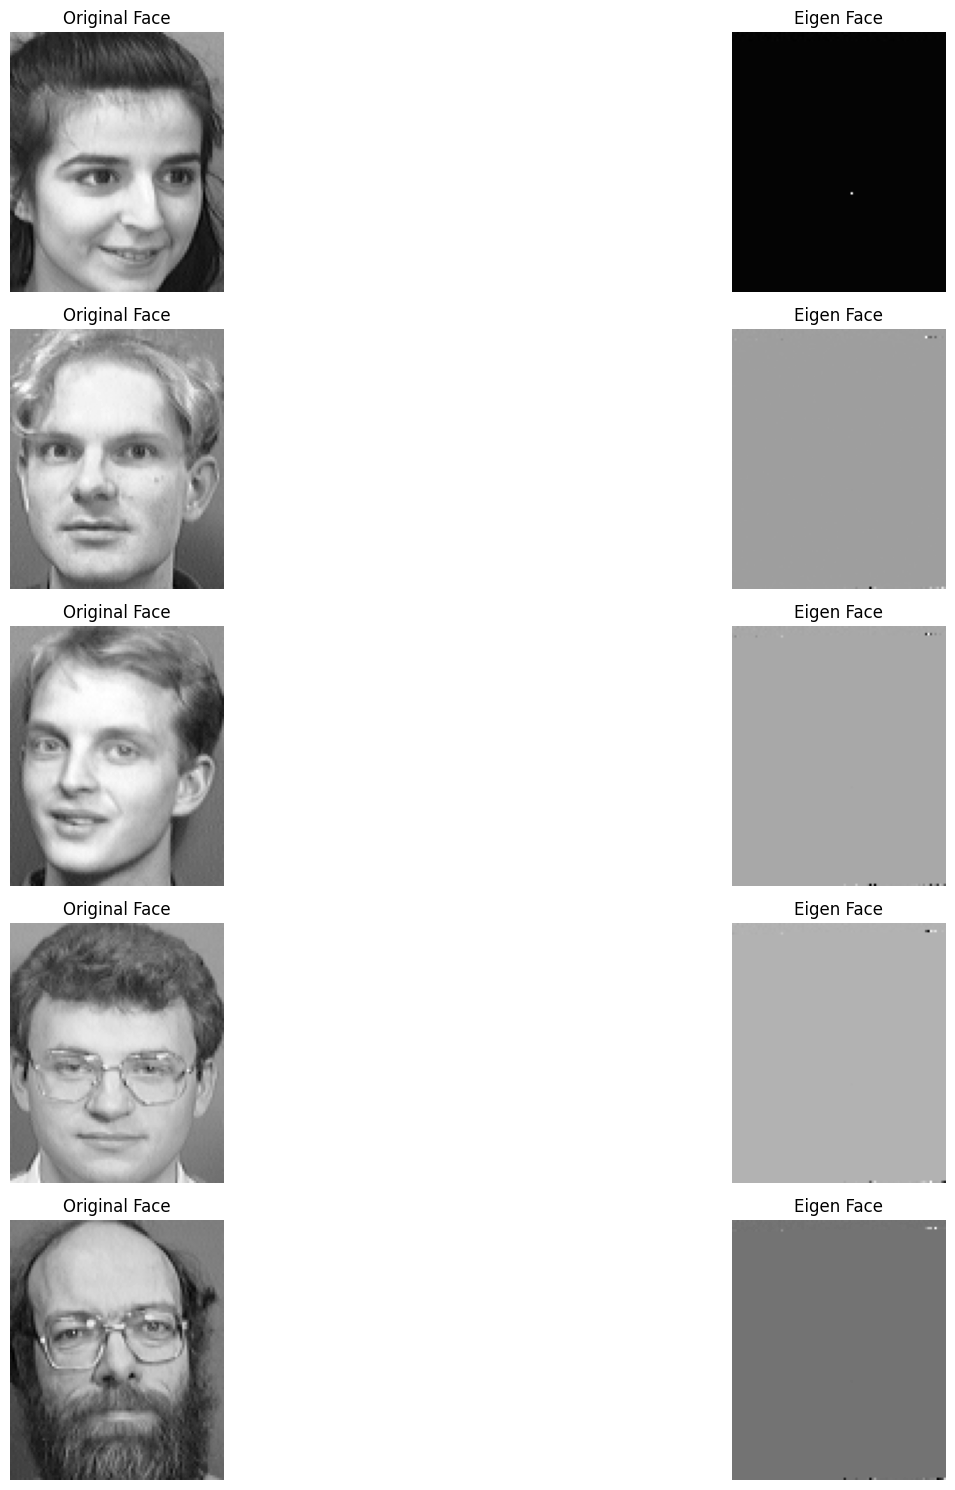

In [33]:
# plot the eigen faces
%matplotlib inline
fig, axes = plt.subplots(5, 2, figsize=(20, 15))

train_images_reshaped = trainFaces.reshape(-1, 112, 92)
train_images_reshaped2 = eigenfaces.reshape(-1, 112, 92)
for i in range(5):
        # original face
        axes[i, 0].imshow(train_images_reshaped[i], cmap='gray')
        axes[i, 0].set_title('Original Face')

        # eigen face
        axes[i, 1].imshow(train_images_reshaped2[i], cmap='gray')
        axes[i, 1].set_title('Eigen Face')




        axes[i, 0].axis('off')
        axes[i, 1].axis('off')

plt.tight_layout()
plt.show()

#### Implement Image Reconstruction from Eigenfaces


Explain your steps with comments and write a brief explanation of the method.

In [34]:
def imageReconstruction(testFace, eigenFaces, meanFace):
    """
    Helper function to reconstruct images
    """
    testFace=testFace-meanFace
    testFace=np.dot(testFace,eigenFaces)
    testFace=np.dot(testFace,eigenFaces.T)
    return testFace

In [35]:
# plot recontructions here
%matplotlib inline

def plot_reconstructions(test_faces, reconstructed_faces, num_images=5):
    fig, axes = plt.subplots(num_images, 2, figsize=(20, 15))

    for i in range(num_images):
        # original face
        axes[i, 0].imshow(test_faces[i], cmap='gray')
        axes[i, 0].set_title('Original Face')

        # reconstructed face
        axes[i, 1].imshow(reconstructed_faces[i], cmap='gray')
        axes[i, 1].set_title('Reconstructed Face')



        axes[i, 0].axis('off')
        axes[i, 1].axis('off')

    plt.tight_layout()
    plt.show()



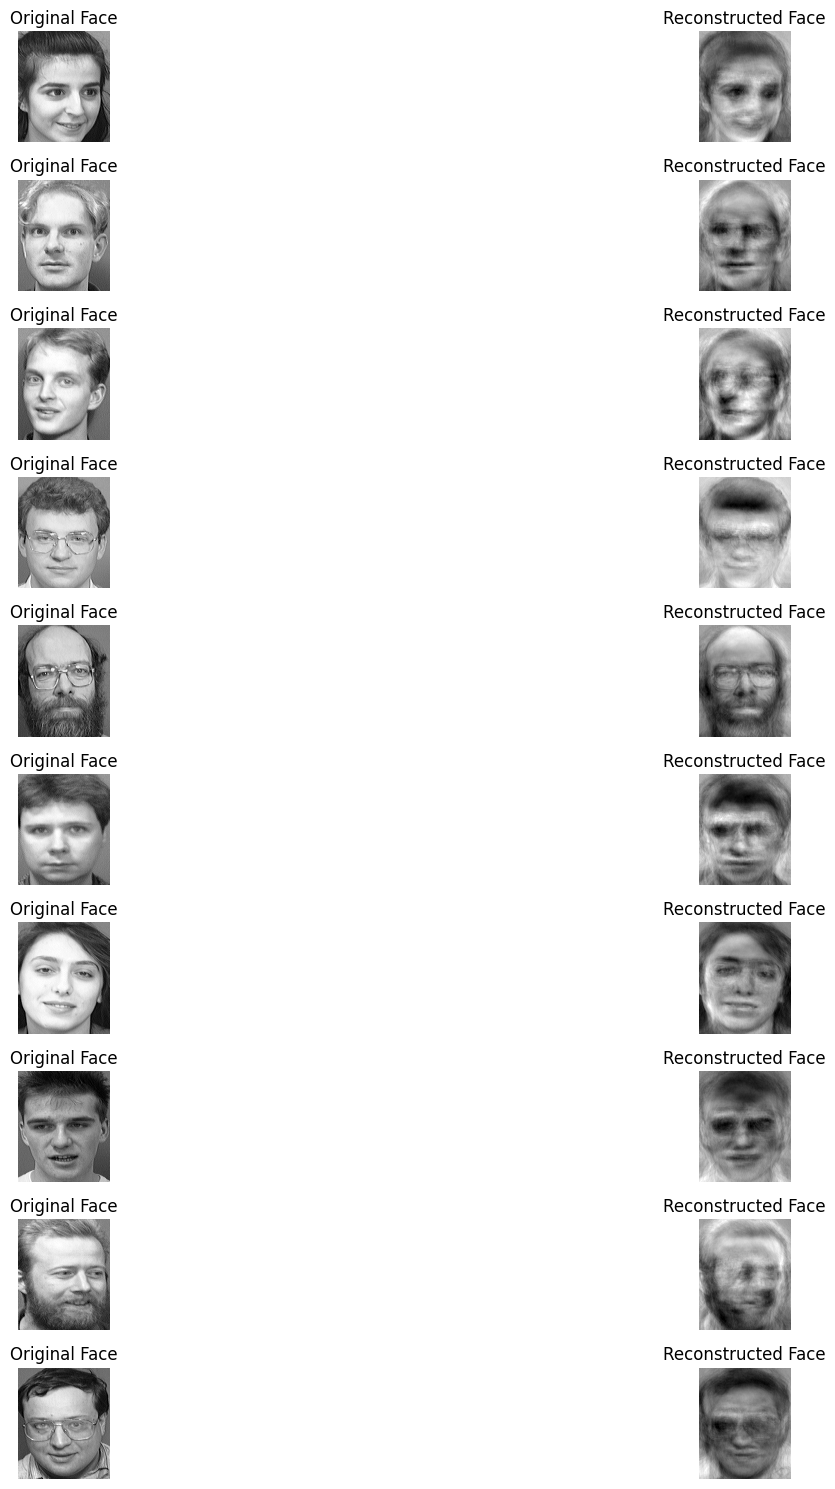

In [36]:
# plot recontructions here
pca_components=[3,5,10,20,30,40,50]
for k in pca_components:
    eigen_faces = eigenfaces[:,:k]
    #taking only first 10 images from test set
    reconstructedImages = imageReconstruction(trainFaces[:10,:],eigen_faces,trainFaces_mean)
    reconstructed_images_reshaped = reconstructedImages.reshape(-1, 112, 92)
    train_images_reshaped = trainFaces.reshape(-1, 112, 92)

    #print(reconstructed_images_reshaped.shape,train_images_reshaped.shape)
plot_reconstructions(train_images_reshaped[:10,:],reconstructed_images_reshaped,num_images=10)

#### Visualisation
Visualise the results for different number of factors(pc = 5, 10, 50, 100, etc.)

**Note:** Ensure that the images are labelled appropriately.

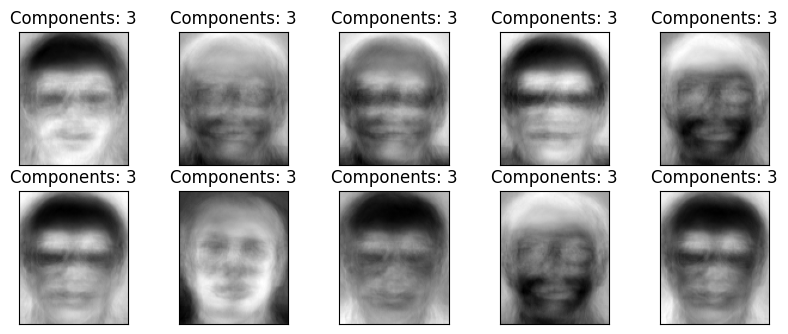

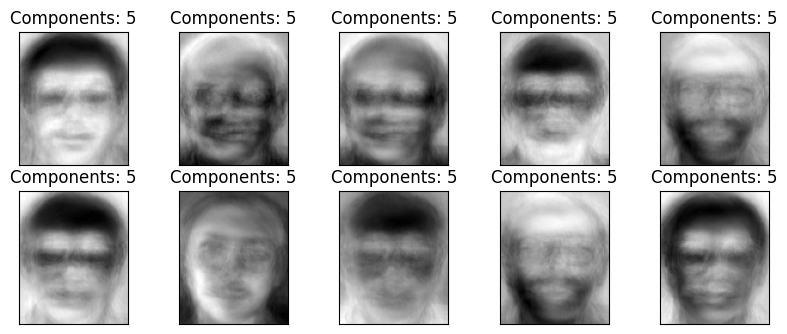

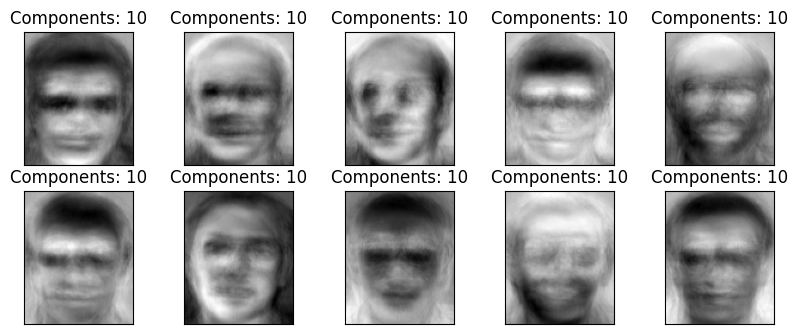

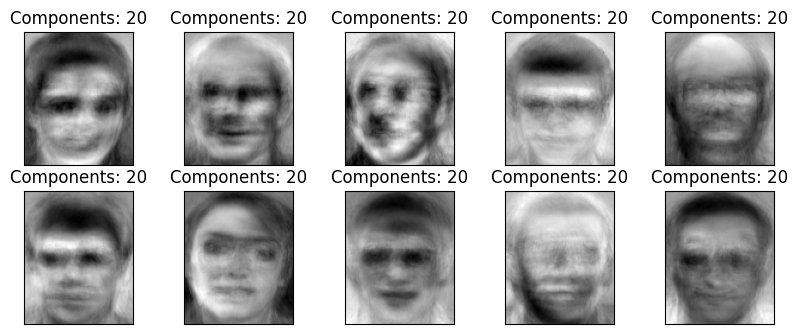

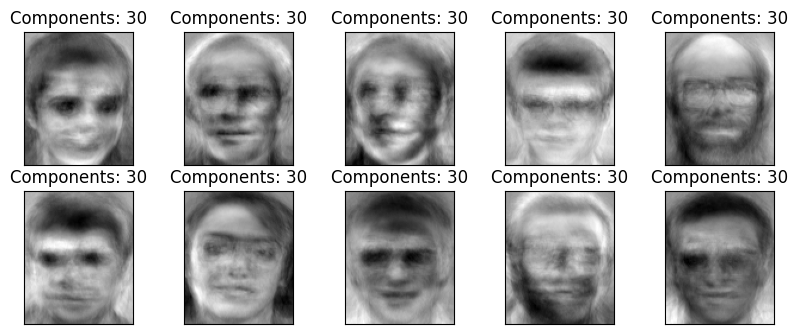

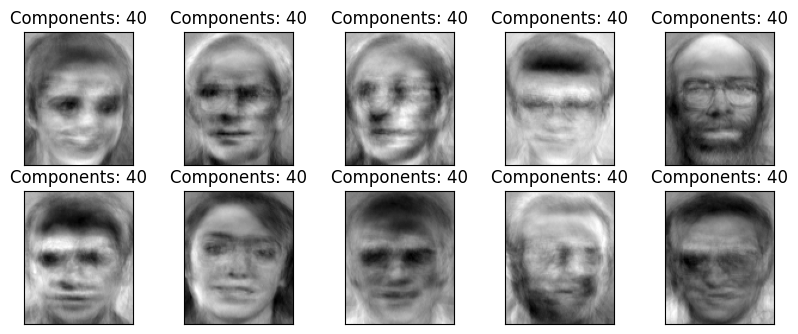

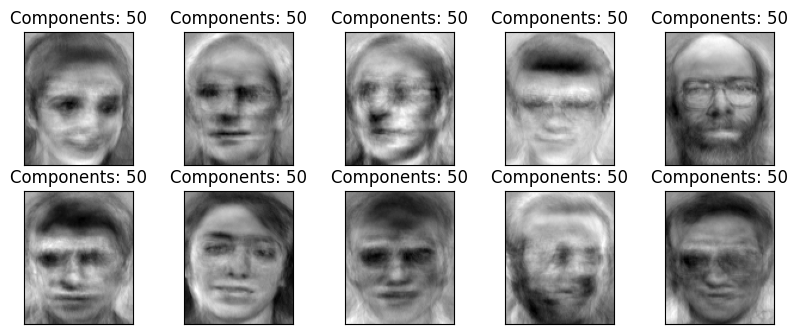

In [37]:
%matplotlib inline

def displayNfactors():

  # your code here
  for k in pca_components:
    eigen_faces = eigenfaces[:,:k]
    #considering first 10 images from test set
    reconstructedImages = imageReconstruction(trainFaces[:10,:],eigen_faces,trainFaces_mean)
    plt.figure(figsize=(10,10))
    for i in range(10):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.title('Components: '+str(k))
        plt.imshow(reconstructedImages[i].reshape(112, 92),cmap='gray')
    plt.show()
displayNfactors()

#### Implement face recognition module based on the norm
Explain your steps with comments and write a brief explanation of the method.

*   Test the module and report accuracies based on the number of components taken for a range of value and plot them.
*   Also plot the mean square error vs the number of eigenvectors taken and report your observations.
*   For further empirical analysis, plot the semi-log variant of the error plot obtained above.

In [38]:
def getClass():
    """
    Arguments:
    1. Test image
    2. Eigenvectors
    3. Mean Eigen Face
    4. Training Set(X_train,y_train)

    The function must return the following:
    1. image with smallest error
    2. error value
    3. prediction class
    """

    # your code here

    return None

In [39]:
def getClass(test_image, eigen_vectors, mean_eigen_face, X_train, y_train):
    """
    Arguments:
    1. Test image
    2. Eigenvectors
    3. Mean Eigen Face
    4. Training Set(X_train,y_train)

    The function must return the following:
    1. image with smallest error
    2. error value
    3. prediction class
    """
    reduced_X_train = np.dot(X_train - mean_eigen_face, eigen_vectors)
    reduced_X_test = np.dot(test_image - mean_eigen_face, eigen_vectors)

    min_error = float('inf')
    predicted_class = None
    predicted_image = None

    for i in range(reduced_X_test.shape[0]):
        # 1-NN
        minMSE = float('inf')
        index = 0
        for j in range(reduced_X_train.shape[0]):
            mse = np.sum(np.square(reduced_X_test[i] - reduced_X_train[j])) / len(reduced_X_train[j])
            if mse < minMSE:
                minMSE = mse
                index = j

        if minMSE < min_error:
            min_error = minMSE
            predicted_class = y_train[index]
            predicted_image = X_train[index]

    return predicted_image, min_error, predicted_class


In [40]:
test_face = testFaces[0]
best_reconstructed_image, min_error, predicted_class = getClass(test_face, eigenfaces[:,:k], trainFaces_mean, trainFaces, trainLabels)

print("Predicted Class:", predicted_class)
print("Minimum Reconstruction Error:", min_error)

Predicted Class: 15
Minimum Reconstruction Error: 105809.84195042176


Iterate through all the images in the test data and test the accuracy by taking different number of components

In [41]:
def testAccuracy(X_test, eigen_faces, X_train_mean, X_train, y_train):
    reduced_X_train = np.dot(X_train - X_train_mean, eigen_faces)
    reduced_X_test = np.dot(X_test - X_train_mean, eigen_faces)

    Y_pred = []
    errors = 0
    images = []

    for i in range(reduced_X_test.shape[0]):
        minMSE = float('inf')
        index = 0
        for j in range(reduced_X_train.shape[0]):
            mse = np.sum(np.square(reduced_X_test[i] - reduced_X_train[j])) / len(reduced_X_train[j])
            if mse < minMSE:
                minMSE = mse
                index = j

        Y_pred.append(y_train[index])
        errors += minMSE
        images.append(X_train[index])

    images = np.asarray(images)
    Y_pred = np.asarray(Y_pred)

    return images, errors, Y_pred


In [42]:
components = [3,5,10,20,30,40,500]
mse = []

"""
Iterate through all the images in the test data and
test the accurate by taking different number of components
"""

for numComponents in components:
    images, errors, Y_pred = testAccuracy(testFaces, eigenfaces[:,:numComponents], trainFaces_mean, trainFaces, trainLabels)
    print("Accuracy for test set for number of components=",numComponents," is : ",accuracy_score(testLabels,Y_pred))
    mse.append(errors)

Accuracy for test set for number of components= 3  is :  0.8
Accuracy for test set for number of components= 5  is :  0.925
Accuracy for test set for number of components= 10  is :  1.0
Accuracy for test set for number of components= 20  is :  1.0
Accuracy for test set for number of components= 30  is :  1.0
Accuracy for test set for number of components= 40  is :  1.0
Accuracy for test set for number of components= 500  is :  0.975


Plot Number of eigenvectors vs Mean Square Error

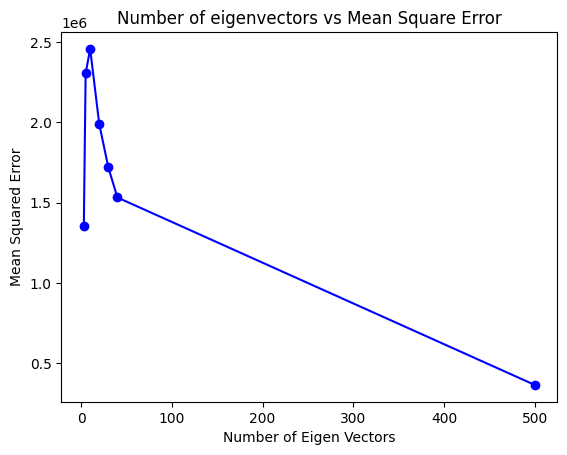

In [43]:
# your code here
plt.plot(components,mse,'bo-')
plt.xlabel('Number of Eigen Vectors')
plt.ylabel('Mean Squared Error')
plt.title('Number of eigenvectors vs Mean Square Error')
plt.show()

Plot Number of eigenvectors vs Logarithmic Mean Square Error

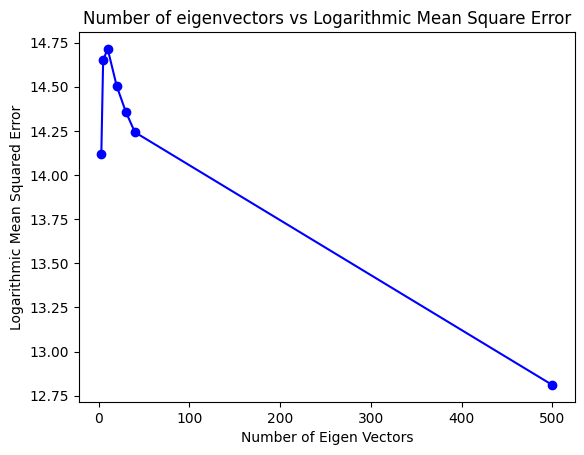

In [44]:
# your code here
plt.plot(components,np.log(mse),'bo-')
plt.xlabel('Number of Eigen Vectors')
plt.ylabel('Logarithmic Mean Squared Error')
plt.title('Number of eigenvectors vs Logarithmic Mean Square Error')
plt.show()